# Hackathon: Credit Lending

You work at a Bank in the credit risk department. Your stakeholders want to be able to determine the level of risk for all internal customers, so that if the customer applies for a new product (eg. loan, credit card, overdraft, mortgage) the correct decision can be made as to whether they should get the product or not.

The problem with the curent set up is that each individual product has their own way of determining a customer's level of risk. This means that a customer may be rejected to extend their overdraft to €2.000 but accepted to have a loan of €2.000 at the same time. 

This is providing a bad customer journey which is why the bank wants to consolidate this view of risk so that consistent lending decisions can be made.

Often customers who get rejected will complain about their decision so it is important that we can send advisers to them to talk through their situation and suggest a good option for their lending.

**Note:** The regulators consider customers are "unable to repay" when they have missed 3 payments (on any product) in the last 2 years. 

<img src="images/credit.jpeg" style="display: block;margin-left: auto;margin-right: auto;height: 200px"/>


## About the data

We have access to data on a large number of customers.

The unable to repay flag is named `bad_flag` and is determined using the description above. The rest of the features in the dataset are described below:

|Variable Name|	Description	|Type|
|:---|:---|:---|
|rev_unsecured|	Total balance on loans (no real estate) as a percentage of the total loan taken 	|percentage|
|age	|Age of borrower in years	|integer|
|days_past_due_30	|Number of times borrower has been 30-59 days past due in the last |2 years |integer|
|debt_ratio	|Monthly debt payments, alimony, living costs divided by monthy gross income|	float (%)|
|income |	Monthly income	|float|
|num_credit	|Number of Open loans (car loan, mortgage, credit cards etc.)	|integer|
|num_days_late	|Number of times borrower has been 90 days or more past due.	|integer|
|num_realestate	|Number of mortgage and real estate loans including home equity lines of credit	|integer|
|days_past_due_60	|Number of times borrower has been 60-89 days past due in the last 2 years.|	integer|
|num_deps|	Number of dependents in family excluding themselves (spouse, children etc.)	|integer|
|bad_flag	|Missed 3 monthly payments or more in past two years |	Y/N|


## Creating the model

We start by loading the data, selecting the features and target and creating a train and test set.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv('data/credit.csv')

features = ['num_realestate', 'debt_ratio', 'income', 'num_credit', 'num_deps']
X = credit.loc[:, features]
y = credit.loc[:, 'bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)

Because there are some missing values in two of the columns, we'll impute those using SimpleImpter within ColumnTransFomer.

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

column_imputer = ColumnTransformer(
    [
        ('imp_inc', SimpleImputer(strategy='mean'), ['income']),
        ('imp_deps', SimpleImputer(strategy='most_frequent'), ['num_deps'])
    ]
    , remainder='passthrough'
)

Now we can create a pipeline with both the preprocessing steps and the model we want (in this case a decision tree), and see how our model performs.

In [19]:
model_dt = DecisionTreeClassifier(max_depth=4, random_state=111)

pipeline_dt = Pipeline(steps = [
    ('imputer', column_imputer),
    ('model', model_dt)
])

pipeline_dt.fit(X_train, y_train)

pipeline_dt.score(X_test, y_test)

0.9331733333333333

# <mark>Exercises</mark>

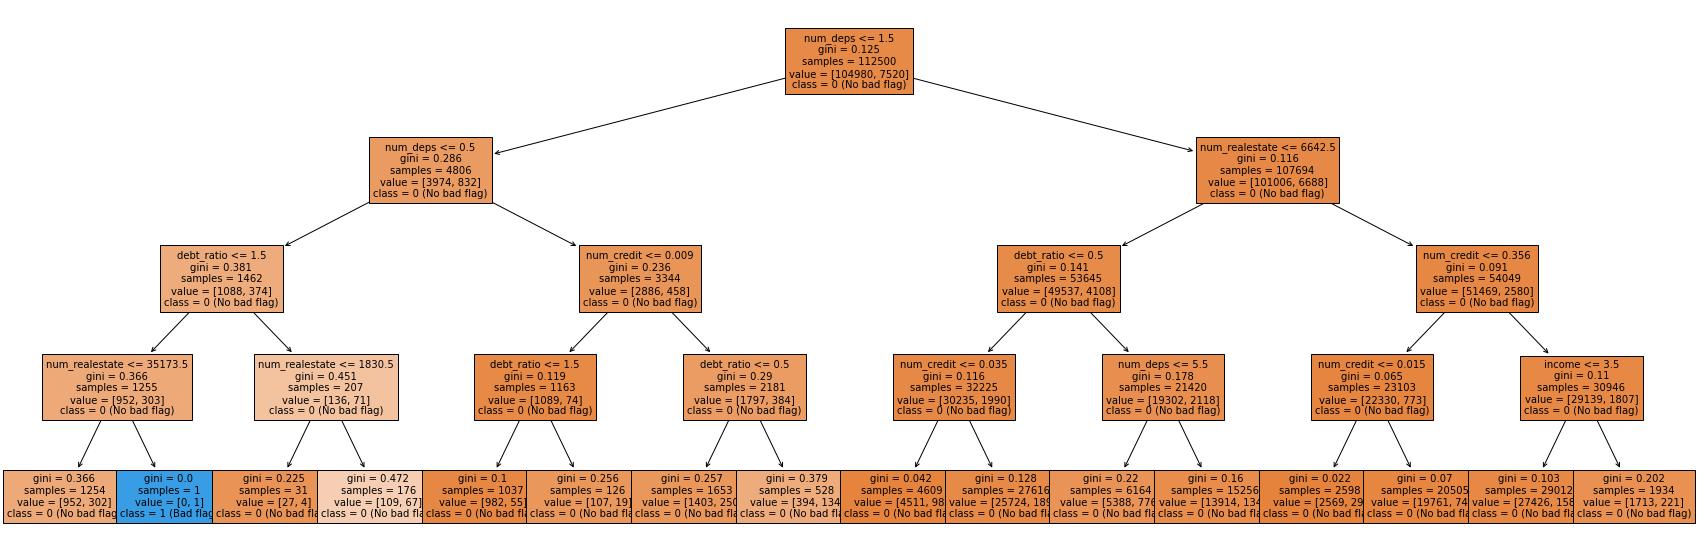

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,10)) #change size here
plot_tree(pipeline_dt['model'], 
          feature_names=features,
          class_names=["0 (No bad flag)", "1 (Bad flag)"],
          filled=True,
          fontsize=10,
          ax=ax,);

<img src='images/gdd-logo.png' align=right width=300px>

